In [2]:
import torch
import torch.nn.functional as F    
import matplotlib.pyplot as plt
plt.ion()  
plt.show()
from torch.autograd import Variable

### 1. 构造数据集

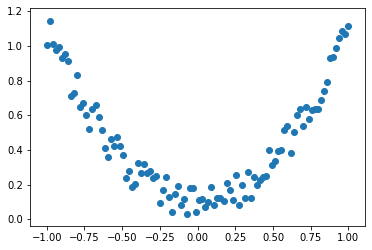

x type: <class 'torch.Tensor'>
y type: <class 'torch.Tensor'>
x shape: torch.Size([100, 1])
y shape: torch.Size([100, 1])


In [9]:
# 1. 构造数据集
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2)+0.2*torch.rand(x.size())    # noisy y data (tensor), shape=(100, 1)
 
# 使用 Variable 来修饰数据 tensor
x, y = torch.autograd.Variable(x), Variable(y)
 
# draw
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

print('x type:', type(x))
print('y type:', type(y))
print('x shape:', x.shape)
print('y shape:', y.shape)


### 2. 搭建神经网络

In [10]:
import torch
import torch.nn.functional as F  
 
class Net(torch.nn.Module):  # 继承torch-Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()    
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层
 
    def forward(self, x):  
        x = F.relu(self.hidden(x))  #激活函数(隐藏层的线性值)
        x = self.predict(x)             
        return x
    
net = Net(n_feature=1, n_hidden=10, n_output=1) 
print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


### 3. 训练模型

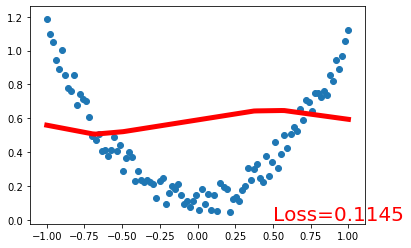

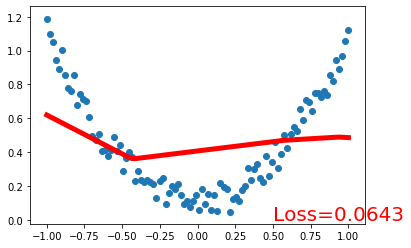

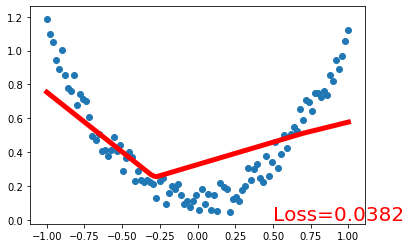

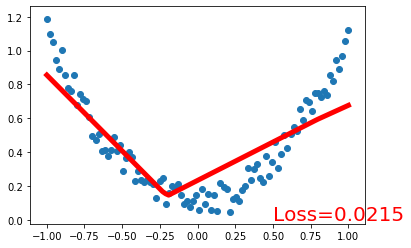

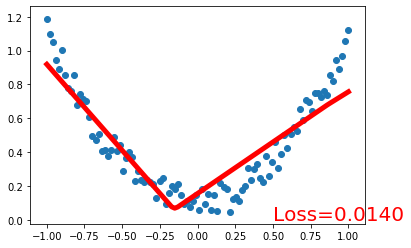

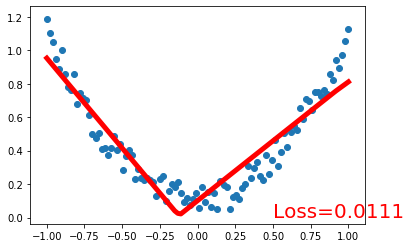

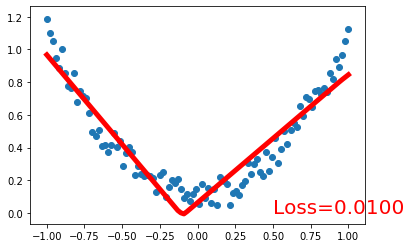

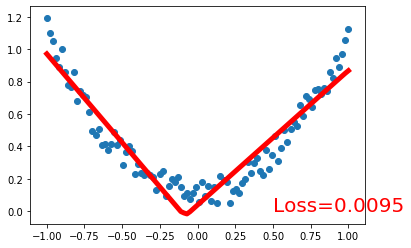

In [14]:
net = Net(n_feature=1, n_hidden=10, n_output=1) 
optimizer = torch.optim.SGD(net.parameters(), lr=0.1) 
# 损失函数：预测值和真实值的误差计算公式 (均方差)
loss_func = torch.nn.MSELoss()   
 
for t in range(300):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)     # 计算两者的误差
 
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()  

    if t % 40 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.item(), fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

### 4. 保存网络 

In [ ]:
torch.save(net, 'net.pkl')  